In [15]:
# Cell 1 — Import Libraries
# Step 1: Import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

import joblib


In [16]:
# Cell 2 — Load the Dataset
# Step 2: Load the MARUTI CSV file

data = pd.read_csv("C:\\Users\\Sai Charani\\MARUTI.csv")
print("✅ Dataset loaded successfully!")
print(data.head())
dataset = data[['Close']].values


✅ Dataset loaded successfully!
         Date  Symbol Series  Prev Close    Open    High     Low   Last  \
0  2003-07-09  MARUTI     EQ      125.00  164.90  170.40  155.00  164.0   
1  2003-07-10  MARUTI     EQ      164.30  167.00  168.70  164.50  167.0   
2  2003-07-11  MARUTI     EQ      167.00  167.75  174.85  166.25  173.6   
3  2003-07-14  MARUTI     EQ      173.35  174.25  179.25  174.25  178.6   
4  2003-07-15  MARUTI     EQ      177.95  200.00  200.00  173.00  176.3   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  164.30  165.95  35164283  5.835528e+14     NaN           8537695.0   
1  167.00  166.74  10464179  1.744820e+14     NaN           4363947.0   
2  173.35  172.45  11740117  2.024622e+14     NaN           3014852.0   
3  177.95  177.91   5982324  1.064313e+14     NaN           1949217.0   
4  176.20  176.88   6173689  1.092001e+14     NaN           1307694.0   

   %Deliverble  
0       0.2428  
1       0.4170  
2       0.2568  
3       0.3

In [17]:
# Cell 3 — Normalize the Data
# Step 3: Normalize 'Close' values between 0 and 1

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print("✅ Data normalized successfully!")
print("Scaled sample:", scaled_data[:5])


✅ Data normalized successfully!
Scaled sample: [[0.        ]
 [0.00027927]
 [0.00093606]
 [0.00141185]
 [0.00123085]]


In [18]:
# Cell 4 — Create Sequences for LSTM
# Step 4: Create X (input) and y (target) sequences

def create_dataset(series, time_step=60):
    X, y = [], []
    for i in range(time_step, len(series)):
        X.append(series[i-time_step:i, 0])  # previous 60 days
        y.append(series[i, 0])              # next day
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print("✅ Data prepared for LSTM!")
print("X shape:", X.shape)
print("y shape:", y.shape)


✅ Data prepared for LSTM!
X shape: (4265, 60, 1)
y shape: (4265,)


In [19]:
# Cell 5 — Build the LSTM Model
# Step 5: Build the LSTM model

model = Sequential([
    Input(shape=(X.shape[1], 1)),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

print("✅ LSTM model built successfully!")
model.summary()


✅ LSTM model built successfully!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Cell 6 — Train the LSTM Model
# Step 6: Train the model

history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)

print("✅ Model training completed!")


Epoch 1/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - loss: 0.0071
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 0.0018
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 0.0019
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 0.0016
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 0.0017
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - loss: 0.0013
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0014
Epoch 8/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 0.0013
Epoch 9/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0012
Epoch 10/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0011
Epoch 11/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 0.0013
Epoch 12/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0012
Epoch 13/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - loss: 9.6386e-04
Epoch 14/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0011    
Epoch 15/20
134/134 ━━━━━━━━━━

134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


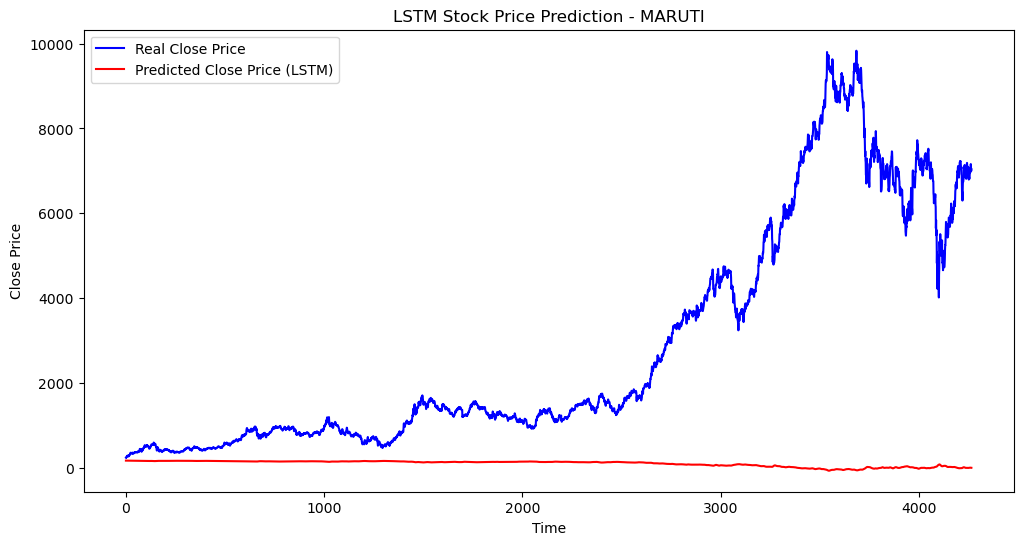

In [20]:
# Cell 7 — Predictions using LSTM
# Step 7: Make predictions using trained LSTM model

predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)
real = scaler.inverse_transform(y.reshape(-1,1))

plt.figure(figsize=(12,6))
plt.plot(real, color='blue', label="Real Close Price")
plt.plot(predicted, color='red', label="Predicted Close Price (LSTM)")
plt.title("LSTM Stock Price Prediction - MARUTI")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [8]:
# Cell 8 — Save LSTM Model and Scaler
# Step 8: Save the trained model and scaler

model.save("maruti_lstm_model.h5")
joblib.dump(scaler, "maruti_scaler.pkl")

print("✅ Saved LSTM model as 'maruti_lstm_model.h5'")
print("✅ Saved Scaler as 'maruti_scaler.pkl'")


✅ Saved LSTM model as 'maruti_lstm_model.h5'
✅ Saved Scaler as 'maruti_scaler.pkl'


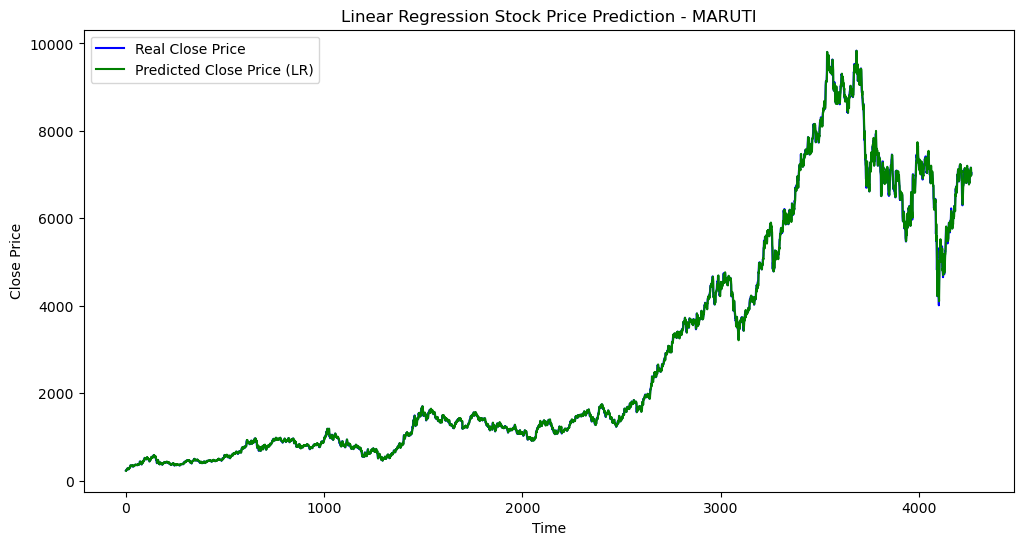

✅ Linear Regression model saved as 'maruti_lr_model.pkl'


In [9]:
# Cell 9 — Linear Regression Model
# Step 9: Build and train a Linear Regression model for comparison

X_lr, y_lr = [], []
for i in range(60, len(scaled_data)):
    X_lr.append(scaled_data[i-60:i, 0])
    y_lr.append(scaled_data[i, 0])

X_lr, y_lr = np.array(X_lr), np.array(y_lr)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_lr, y_lr)

# Predictions
pred_lr = lr_model.predict(X_lr)
pred_lr = scaler.inverse_transform(pred_lr.reshape(-1,1))

# Plot
plt.figure(figsize=(12,6))
plt.plot(real, color='blue', label="Real Close Price")
plt.plot(pred_lr, color='green', label="Predicted Close Price (LR)")
plt.title("Linear Regression Stock Price Prediction - MARUTI")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# Save model
joblib.dump(lr_model, "maruti_lr_model.pkl")

print("✅ Linear Regression model saved as 'maruti_lr_model.pkl'")


In [10]:
# Cell 10 — Compare Model Performance
# Step 10: Compare RMSE and MAE

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_lstm = np.sqrt(mean_squared_error(real, predicted))
mae_lstm = mean_absolute_error(real, predicted)

rmse_lr = np.sqrt(mean_squared_error(real, pred_lr))
mae_lr = mean_absolute_error(real, pred_lr)

print("📊 LSTM RMSE:", rmse_lstm)
print("📊 LSTM MAE:", mae_lstm)
print("📈 Linear Regression RMSE:", rmse_lr)
print("📈 Linear Regression MAE:", mae_lr)


📊 LSTM RMSE: 194.56221110124608
📊 LSTM MAE: 123.07245838947898
📈 Linear Regression RMSE: 66.27893465226265
📈 Linear Regression MAE: 36.99215740251302


In [21]:
# Cell 11 — Predict the Next Day’s Price
# Step 11: Predict the next 5 days closing price using both models

# For LSTM
last_60_lstm = scaled_data[-60:].reshape(1, 60, 1)
predicted_lstm_5days = []

for _ in range(5):
    next_day_scaled = model.predict(last_60_lstm)
    next_day_price = scaler.inverse_transform(next_day_scaled)[0][0]
    predicted_lstm_5days.append(next_day_price)
    
    # Update last_60_lstm for next iteration
    next_day_scaled_reshaped = next_day_scaled.reshape(1,1,1)
    last_60_lstm = np.append(last_60_lstm[:,1:,:], next_day_scaled_reshaped, axis=1)

print("🔮 Next 5 Days Predicted Close Price (LSTM):", predicted_lstm_5days)

# For Linear Regression
last_60_lr = scaled_data[-60:].reshape(1, -1)
predicted_lr_5days = []

for _ in range(5):
    next_day_lr_scaled = lr_model.predict(last_60_lr)
    next_day_price_lr = scaler.inverse_transform(next_day_lr_scaled.reshape(-1,1))[0][0]
    predicted_lr_5days.append(next_day_price_lr)
    
    # Update last_60_lr for next iteration
    last_60_lr = np.append(last_60_lr[:,1:], next_day_lr_scaled.reshape(1,1), axis=1)

print("🔮 Next 5 Days Predicted Close Price (LR):", predicted_lr_5days)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
🔮 Next 5 Days Predicted Close Price (LSTM): [np.float32(-7.2192125), np.float32(-0.6590648), np.float32(15.714688), np.float32(40.65234), np.float32(71.32515)]
🔮 Next 5 Days Predicted Close Price (LR): [np.float64(7035.400112623825), np.float64(7053.764256631468), np.float64(7041.230270670958), np.float64(7059.178035504814), np.float64(7064.311278854262)]
